In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_row", 60)
pd.set_option("display.max_column", 60)
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
df = pd.read_csv('df_clean.csv', index_col=0)
print(df.shape)
df.head()

(1578, 20)


,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,Hotel,7,DOWNTOWN,1927,12,88434,Hotel,88434.0,NaN,0.0,NaN,0.0,60.0,84.300003,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83
1,Hotel,7,DOWNTOWN,1996,11,103566,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,97.900002,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86
2,Hotel,7,DOWNTOWN,1969,41,956110,Hotel,756493.0,NaN,0.0,NaN,0.0,43.0,97.699997,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19
3,Hotel,7,DOWNTOWN,1926,10,61320,Hotel,61320.0,NaN,0.0,NaN,0.0,56.0,113.300003,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67
4,Hotel,7,DOWNTOWN,1980,18,175580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,118.699997,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88


# K-means

On va regrouper les types de bien similaires à l'aide de l'algorithme K-means et fusionner les valeurs qui apparaissent peu souvent avec celles qui sont plus fréquentes et équivalentes

In [4]:
df["SteamUse(kBtu/sf)"] = df["SteamUse(kBtu)"]/df["PropertyGFATotal"]
df["Electricity(kBtu/sf)"] = df["Electricity(kBtu)"]/df["PropertyGFATotal"]
df["NaturalGas(kBtu/sf)"] = df["NaturalGas(kBtu)"]/df["PropertyGFATotal"]

In [5]:
df.columns

Index(['PrimaryPropertyType', 'CouncilDistrictCode', 'Neighborhood',
       'YearBuilt', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'SteamUse(kBtu/sf)',
       'Electricity(kBtu/sf)', 'NaturalGas(kBtu/sf)'],
      dtype='object')

In [6]:
data.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.5,189.0,7226362.5,7456910.0,2003882.0,1156514.25,3946027.0,12764.5293,1276453.0,False,NaN,Compliant,NaN,249.98,2.83


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import decomposition

columns = [
    "NumberofFloors",
    "SiteEUIWN(kBtu/sf)", "GHGEmissionsIntensity",
    "SteamUse(kBtu/sf)", "Electricity(kBtu/sf)", "NaturalGas(kBtu/sf)"
]
X = df[columns]
X.loc[:] = StandardScaler().fit_transform(X)
X.head()

,NumberofFloors,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,SteamUse(kBtu/sf),Electricity(kBtu/sf),NaturalGas(kBtu/sf)
0,1.194298,0.104726,0.498514,1.766846,-0.003711,-0.194460
1,1.043240,0.283634,0.511097,-0.168317,-0.266844,0.692658
2,5.574988,0.281003,0.230077,1.758044,0.138224,-0.518435
3,0.892182,0.486221,1.270271,2.915778,0.006850,0.185683
4,2.100648,0.557258,0.519486,-0.168317,-0.281386,0.704315


Text(0, 0.5, 'Cout du modele (Inertia)')

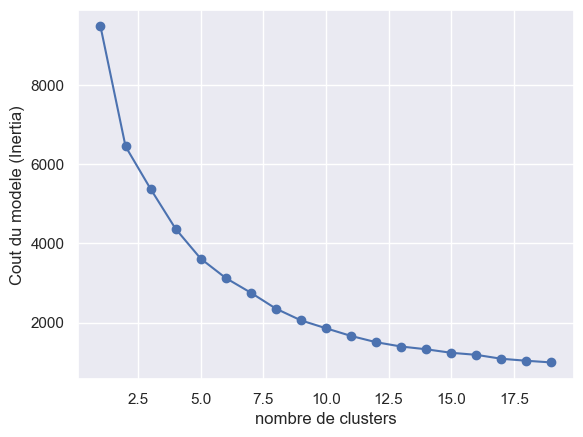

In [8]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia, "-o")
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

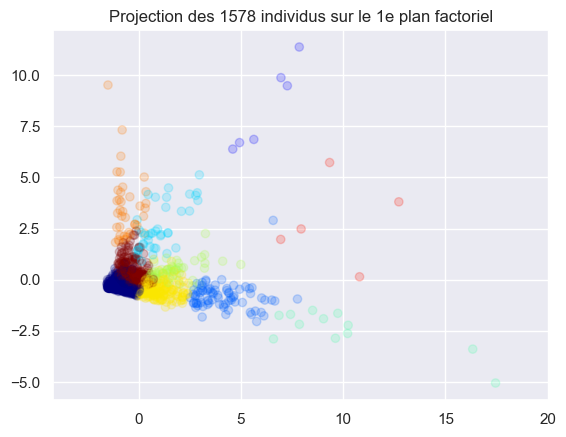

In [9]:
# Nombre de clusters souhaités
n_clust = 10

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.axis('equal');

In [10]:
X['PrimaryPropertyType'] = df['PrimaryPropertyType']
X['cluster'] = clusters

In [11]:
X.loc[X['cluster'] == 0, 'PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Warehouse                      150
Small- and Mid-Sized Office    135
K-12 School                    108
Other                           88
Worship Facility                61
Retail Store                    56
Distribution Center             47
Mixed Use Property              41
Self-Storage Facility           27
Large Office                    20
Hotel                           16
University                      10
Refrigerated Warehouse           6
Medical Office                   5
Senior Care Community            3
Restaurant                       2
Supermarket / Grocery Store      1
Hospital                         1
Name: count, dtype: int64

In [12]:
columns = [
    "LargestPropertyUseType",
    "NumberofFloors",
    "SiteEUIWN(kBtu/sf)", "GHGEmissionsIntensity",
    "SteamUse(kBtu/sf)", "Electricity(kBtu/sf)", "NaturalGas(kBtu/sf)"
]
X = df[columns]
X = X.groupby('LargestPropertyUseType').mean()
X.loc[:] = StandardScaler().fit_transform(X)
X.head()

,NumberofFloors,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,SteamUse(kBtu/sf),Electricity(kBtu/sf),NaturalGas(kBtu/sf)
LargestPropertyUseType,,,,,,
Adult Education,-0.664045,-0.446122,-0.223706,-0.426715,-0.499049,0.154555
Automobile Dealership,-0.390875,-0.639783,-0.973627,-0.426715,-0.402303,-0.898144
Bank Branch,-0.371363,-0.414306,-1.152270,-0.426715,-0.219393,-1.219649
College/University,-0.227345,-0.372201,-0.291683,-0.271323,-0.361551,-0.083418
Courthouse,2.653022,-0.226613,-0.063281,-0.426715,-0.257075,0.263311


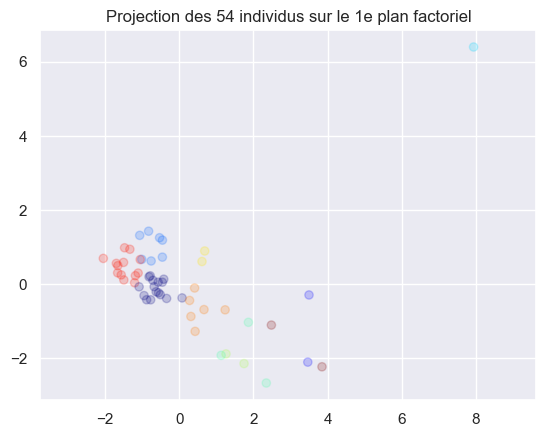

In [13]:
# Nombre de clusters souhaités
n_clust = 10

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.axis('equal');

In [14]:
groups = X.index

# Comparaison des clusters trouvés avec les classification des types de bien
comp = pd.DataFrame({"group": groups, "cluster": clusters})
comp = comp.sort_values('cluster')
clusters.sort()
for cluster in np.unique(clusters):
    display(comp[comp['cluster'] == cluster])
#display(comp.pivot_table(index="group", columns="cluster", aggfunc=len, fill_value=0).T)
#comp[comp['group'] == 'Self-Storage Facility']

,group,cluster
0,Adult Education,0
19,Lodging/Residential,0
52,Wholesale Club/Supercenter,0
27,Other,0
29,Performing Arts,0
30,"Personal Services (Health/Beauty, Dry Cleaning...",0
33,Prison/Incarceration,0
34,Public Services,0
37,"Repair Services (Vehicle, Shoe, Locksmith, etc)",0
10,Fire Station,0


,group,cluster
16,Laboratory,1
50,Urgent Care/Clinic/Outpatient,1


,group,cluster
22,Medical Office,2
38,Residential Care Facility,2
45,Small- and Mid-Sized Office,2
28,Parking,2
26,Office,2
17,Library,2
9,Financial Office,2


,group,cluster
5,Data Center,3


,group,cluster
39,Restaurant,4
49,Supermarket/Grocery Store,4
35,Recreation,4


,group,cluster
7,Education,5
24,Museum,5


,group,cluster
14,Hotel,6
4,Courthouse,6


,group,cluster
20,Mall,7
43,Senior Care Community,7
47,Specialty Hospital,7
31,Police Station,7
18,Lifestyle Center,7
11,Fitness Center/Health Club/Gym,7


,group,cluster
6,Distribution Center,8
1,Automobile Dealership,8
51,Utility,8
2,Bank Branch,8
23,Movie Theater,8
41,Retail Store,8
36,Refrigerated Warehouse,8
12,Food Service,8
32,Pre-school/Daycare,8
15,K-12 School,8


,group,cluster
40,Restaurant/Bar,9
13,Hospital (General Medical & Surgical),9


Catégories qui peuvent être regroupées :
- Mall - lifestyle center - strip mall
- Non-Refregirated Warehouse - Distribution Center

# Dendogramme

In [15]:
#from utils import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing

In [16]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

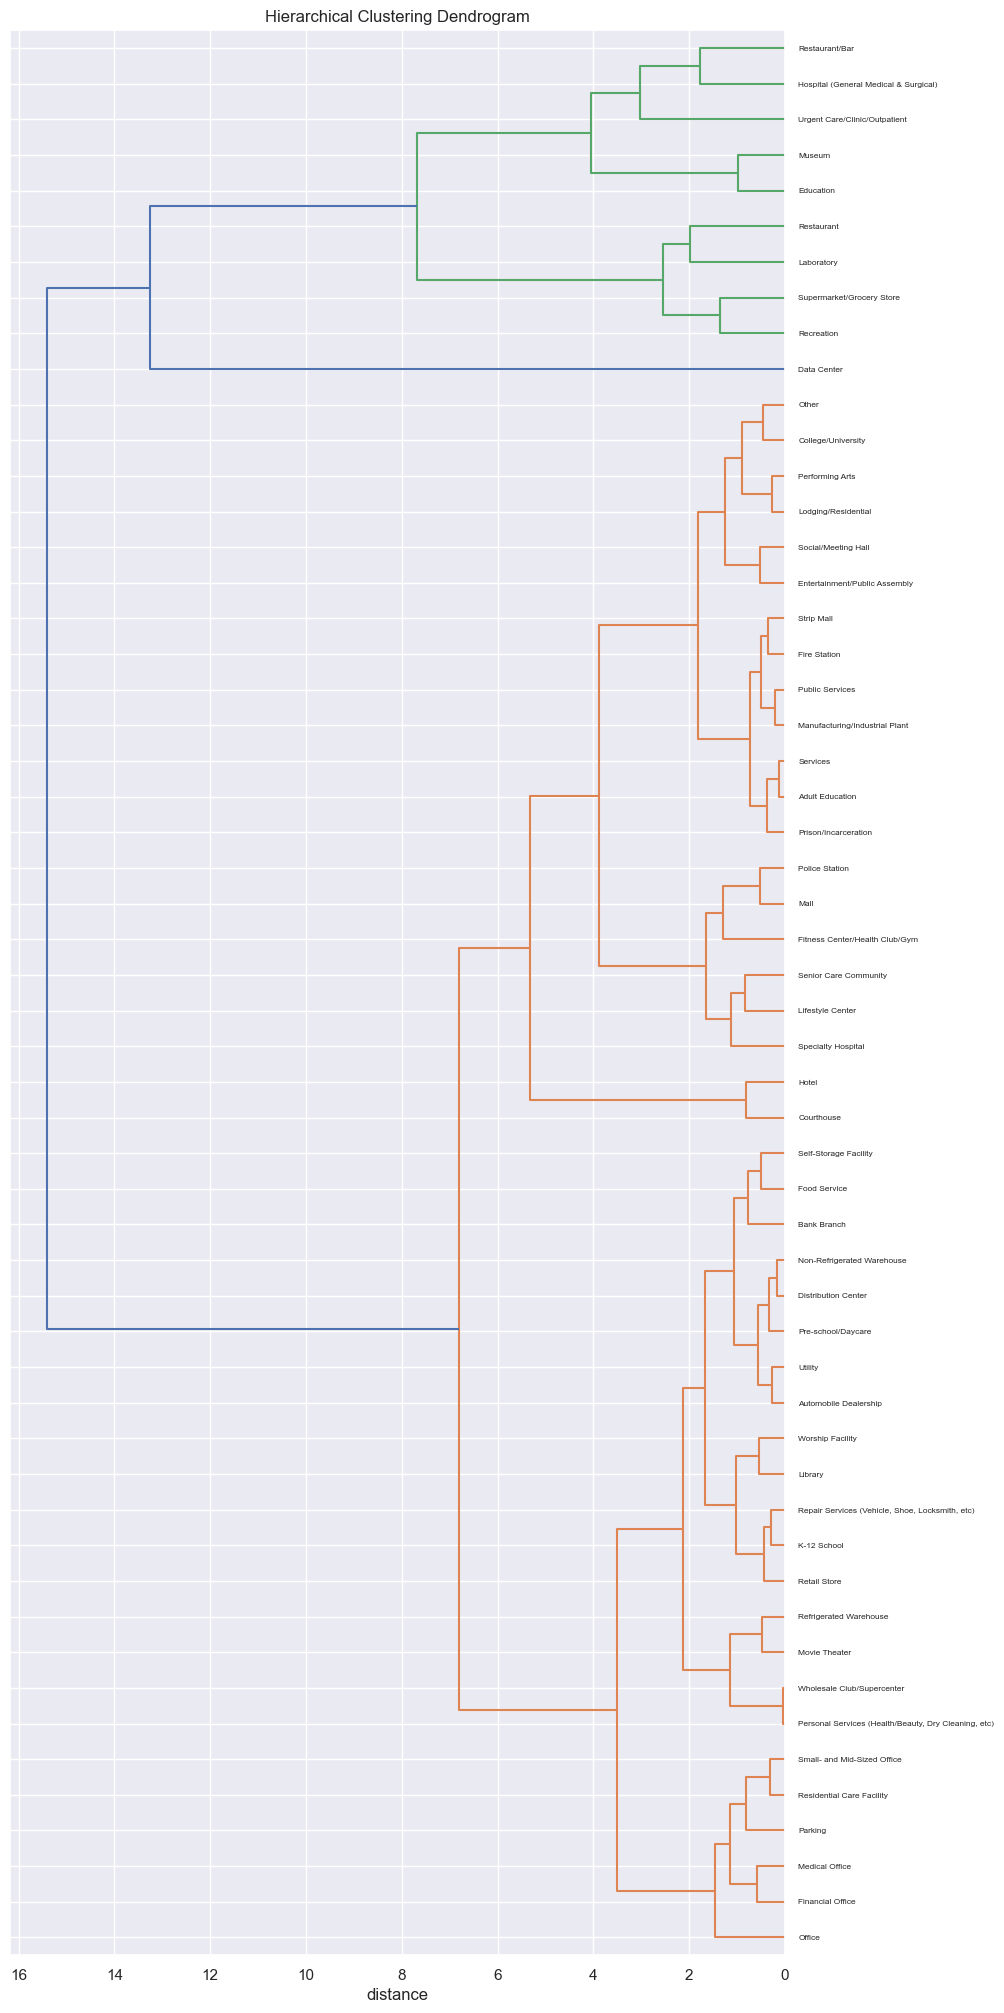

In [17]:

names = X.index

# Clustering hiérarchique
Z = linkage(X, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [18]:
# Coupage du dendrogramme en 20 clusters
clusters = fcluster(Z, 20, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

groups = X.index
# Comparaison des clusters trouvés avec les classification des types de bien
comp = pd.DataFrame({"group": groups, "cluster": clusters})
display(comp.sort_values('cluster'))
#display(comp.pivot_table(index="group", columns="cluster", aggfunc=len, fill_value=0).T)

,group,cluster
45,Small- and Mid-Sized Office,1
38,Residential Care Facility,1
28,Parking,1
9,Financial Office,1
22,Medical Office,1
26,Office,2
36,Refrigerated Warehouse,3
30,"Personal Services (Health/Beauty, Dry Cleaning...",3
52,Wholesale Club/Supercenter,3
23,Movie Theater,3


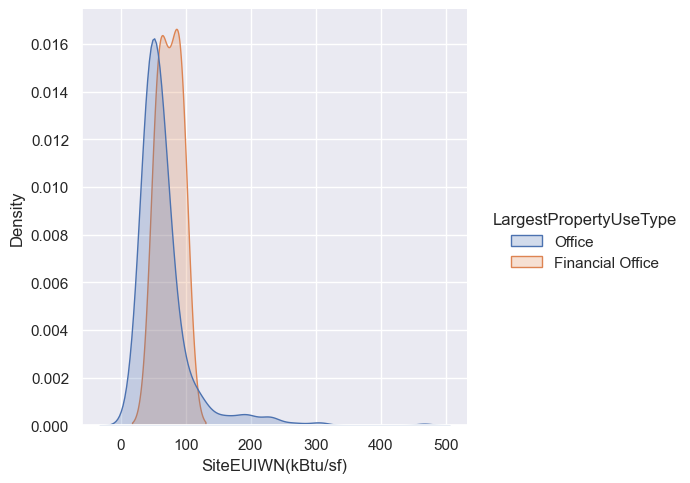

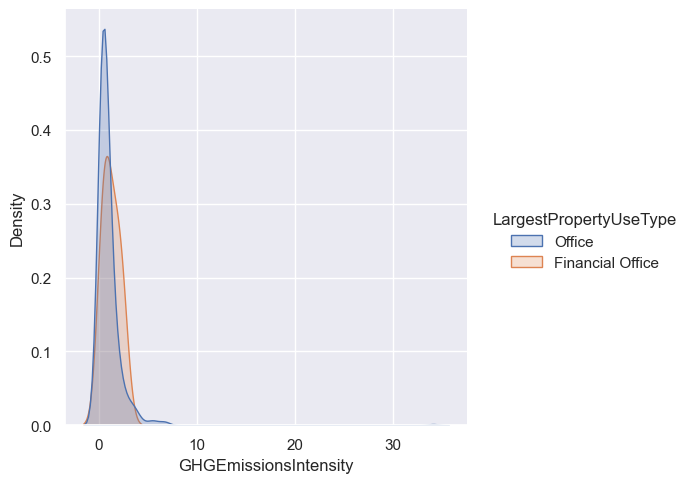

In [19]:
mask = ((df['LargestPropertyUseType'] == 'Financial Office')
       | (df['LargestPropertyUseType'] == 'Office'))

sns.displot(x='SiteEUIWN(kBtu/sf)', data=df[mask], hue='LargestPropertyUseType', kind='kde',
           fill=True, common_norm=False,
           )
sns.displot(x='GHGEmissionsIntensity', data=df[mask], hue='LargestPropertyUseType', kind='kde',
           fill=True, common_norm=False,
           )